In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.misc
import cv2

In [43]:
image = cv2.imread('/home/neuralbee/Downloads/test_images/photo5253573275022371400.jpg')

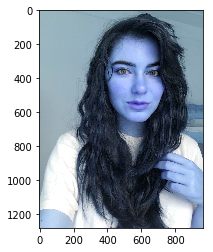

In [44]:
plt.imshow(image)

In [156]:
image.shape

(1063, 826, 3)

In [ ]:
img = np.flip(image, axis=1)

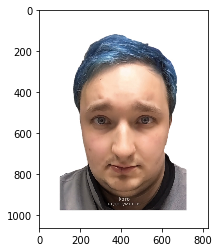

In [168]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [ ]:
image.dtype

In [ ]:
try:
    _imread = scipy.misc.imread
except AttributeError:
    from imageio import imread as _imread

In [ ]:
def imread(path, is_grayscale = False):
    if (is_grayscale):
        return _imread(path, flatten=True).astype(np.float)
    else:
        return _imread(path, mode='RGB').astype(np.float)

In [ ]:
plt.imshow(imread('/home/neuralbee/workspace/Data/women/mouth/without_mouth_with_czech/mouth_563.jpg').astype(np.uint8))

In [3]:
import base64
import cv2
import numpy as np

In [4]:
import numpy as np
import cv2
import base64
from io import StringIO
import requests
import json
 
def encode_image(image):
    _, buff = cv2.imencode('.jpg', image)
    return base64.b64encode(buff).decode('utf-8')
 
def decode_as_image(encoded_image_string):
    decoded_image = base64.b64decode(encoded_image_string)
    return cv2.imdecode(np.frombuffer(decoded_image, dtype=np.uint8), flags=cv2.IMREAD_COLOR)
 
def encode_array(array):
    mesh_buffer = StringIO()
    np.savetxt(mesh_buffer, array)
    mesh_buffer.seek(0)
    return base64.b64encode(mesh_buffer.read()).decode("utf-8")
 
 
 


In [18]:
def request(host, image, intensity):
    selfie_image = encode_image(image)
 
    payload = {'image': selfie_image,
               'intensity': intensity
               }
 
    r = requests.post(host, data=json.dumps(payload))
    return r.json()['result']


In [48]:
import json

In [163]:
with open('/home/neuralbee/Downloads/-.txt') as f:
    data = json.load(f)

In [105]:
image = cv2.imread('/home/neuralbee/workspace/eye_gan/validation/test_make_allign/3.jpg')
selfie_image = encode_image(image)
 
payload = {'image': selfie_image,
           'intensity': 200,
           'style': 28
           }

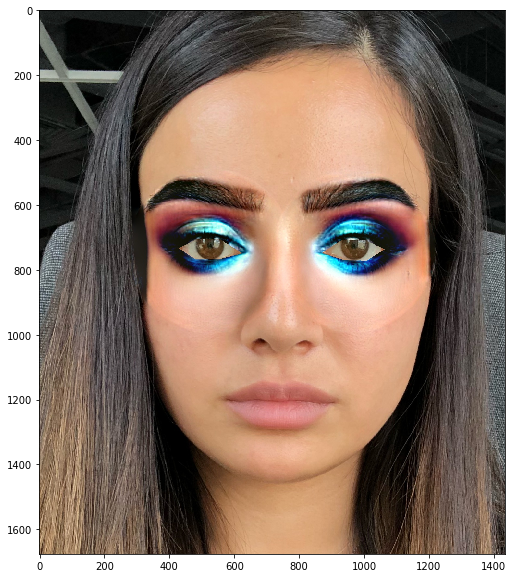

In [106]:
r = requests.post('http://127.0.0.1:5000/eyes', data=json.dumps(payload))
image = r.json()['image']
img = decode_as_image(image)
plt.figure(figsize = (10,10))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [98]:
cv2.imwrite('te.jpg', img)

True

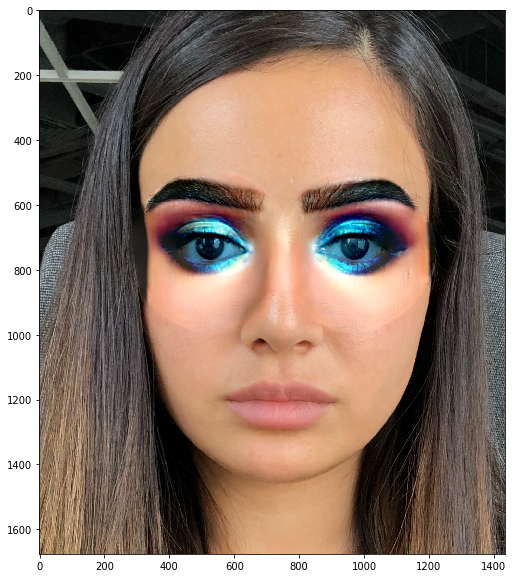

In [103]:
r = requests.post('http://63.33.133.240:5343/eyes', data=json.dumps(payload))
image = r.json()['image']
img = decode_as_image(image)
plt.figure(figsize = (10,10))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [165]:
r = requests.post('http://127.0.0.1:5000/retouch', data=json.dumps(data))

In [132]:
type(r)

requests.models.Response

In [51]:
image = r.json()['image']

In [126]:
img1 = decode_as_image(img1)

In [53]:
image = r.json()['image']
img = decode_as_image(image)
plt.figure(figsize = (10,10))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [70]:
print(img.dtype)

uint8


In [137]:
np.min(img)

0

In [138]:
np.max(img)

255

In [125]:
img1 = data['image']

In [136]:
img.dtype

dtype('uint8')

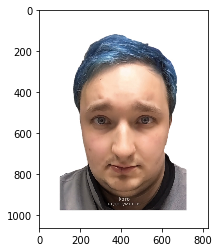

In [127]:
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))

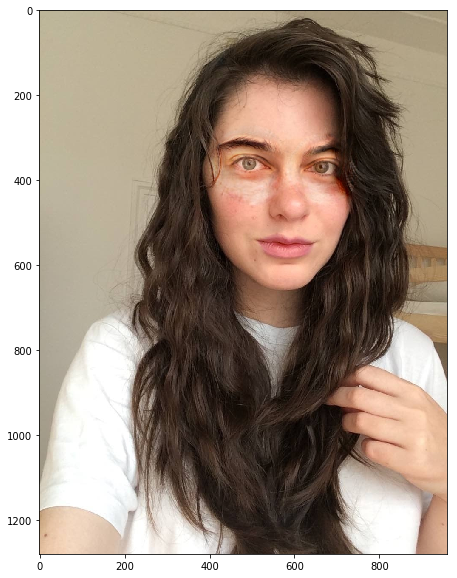

In [54]:
plt.figure(figsize = (10,10))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [29]:
cv2.imwrite('./test.jpg', img)

True

In [ ]:
import albumentations

In [ ]:
aug = albumentations.RandomBrightness(limit=(-0.1, -0.1), p=1.0)

In [ ]:
img = aug(image=image)['image']

In [ ]:
img  = cv2.fastNlMeansDenoisingColored(image,h=1.0, hColor=0.0,templateWindowSize=7,searchWindowSize=21)

In [ ]:
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [ ]:
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [ ]:
cv2.imwrite('./test.jpg', img)

In [29]:
import os
import cv2
import numpy as np
from shutil import copyfile
source_dir = '/home/neuralbee/workspace/cartoon/CartoonGAN-Tensorflow/dataset/face2anime/parser1/crypco_pics/'
source_dir1 = '/home/neuralbee/workspace/cartoon/CartoonGAN-Tensorflow/dataset/face2anime/alina/'

In [30]:
cnt = 0
imgs = os.listdir(source_dir)
for img_name in imgs:
    #print(img_name.split('.')[-1])
    if img_name.split('.')[-1] == 'jpg':
        #print(int(img_name.split('.')[0]))
        if int(img_name.split('.')[0]) > 10000:
            continue
        copyfile(source_dir + img_name, source_dir1  + img_name)
        cnt = cnt + 1

In [ ]:

trainA = os.listdir(source_dir)
cnt = 0
for d in trainA:
    #try:
    imgs = os.listdir(source_dir+d)
    for img_name in imgs:
        if img_name.split('.')[-1] == 'jpg':
            copyfile(source_dir + d +'/' + img_name, source_dir1  + str(cnt)+ '_' + img_name)
            cnt = cnt + 1
    #except Exception:
    #    continue

In [ ]:
imgs = os.listdir(source_dir)
for img_name in imgs:
    img = cv2.imread(source_dir + img_name)
    if (img.shape[0] < 128) or (img.shape[1] < 128):
        continue
    cv2.imwrite(source_dir1 + img_name, img)

In [ ]:
imgs = os.listdir(source_dir)
for img_name in imgs:
    if img_name.split('.')[-1] != 'png':
        continue
    img = cv2.imread(source_dir + img_name, cv2.IMREAD_UNCHANGED)
    #print(img.shape)
    try:
        mask = img[:,:,3]
        vis_ind = np.argwhere(mask > 0)
        vis_min = np.min(vis_ind, 0)
        vis_max = np.max(vis_ind, 0)
        edge = (int(vis_max[1] - vis_min[1]), int(vis_max[0] - vis_min[0]))
        img_new = img[(vis_min[0]):(vis_min[0] + edge[1]+1), (vis_min[1]):(vis_min[1] + edge[0]+1)]
        img_new1 = img_new[:,:,:3]
        img_new1[img_new[:, :, 3] == 0] = [255, 255, 255]
        cv2.imwrite(source_dir1+img_name, img_new1)
    except Exception:
        continue

In [ ]:
img = cv2.imread('/home/neuralbee/workspace/cartoon/CartoonGAN-Tensorflow/dataset/face2sticker/cartoonset10k/cs1048486361028912.png', cv2.IMREAD_UNCHANGED)

In [ ]:
img.shape

In [ ]:
plt.imshow(img[:,:,3])

In [ ]:
plt.imshow(img_new)

In [ ]:
gray_img.shape

In [ ]:
img_new[img[:, :, 3] == 0] = [255, 255, 255]

In [ ]:
img_new = img[:,:,:3]

In [ ]:
cv2.imwrite('test.jpg', img_new)

In [ ]:
mask = img[:,:,3]
vis_ind = np.argwhere(mask > 0)
vis_min = np.min(vis_ind, 0)
vis_max = np.max(vis_ind, 0)
edge = (int(vis_max[1] - vis_min[1]), int(vis_max[0] - vis_min[0]))
img_new = img[(vis_min[0]):(vis_min[0] + edge[1]+1), (vis_min[1]):(vis_min[1] + edge[0]+1)]

In [ ]:
mask.shape

In [ ]:
vis_min

In [ ]:
import json

In [ ]:

with open('anime.json') as f:
    data = json.load(f)

In [ ]:
data

In [ ]:
d = {}
for p in data['objects']:
    num = int(p['classTitle'].split('_')[-1])
    d[num] = p['points']['exterior'][0]

In [ ]:
d

In [ ]:
points = []
for i in range(0, 27):
    points.append(d[i])

In [ ]:
output = {'dlibLand' : points}

In [ ]:
with open('data.json', 'w') as fp:
    json.dump(output, fp)

In [32]:
import cv2
import os
import tensorflow as tf
from scipy import misc
import numpy as np
export_path = '/home/neuralbee/workspace/cartoon/CartoonGAN-Tensorflow/models/models11'

In [33]:

def prepare_input(img, size=256):
    img = misc.imresize(img, [size, size])
    img = np.expand_dims(img, axis=0)
    img = preprocessing(img)

    return img

def preprocessing(x):
    x = x/127.5 - 1 # -1 ~ 1
    return x

def inverse_transform(image):
    return (image+1.) / 2

In [47]:
import requests

import base64
import cv2
import dlib
import numpy as np
from sklearn.externals import joblib
from skimage.transform import PiecewiseAffineTransform, warp, ProjectiveTransform
from imutils import face_utils
from utils_allign import extract_left_eye_center, extract_right_eye_center, get_rotation_matrix, crop_image
from glob import glob

WARP_POINTS = np.arange(17).tolist() + [17, 19, 21, 22, 24, 26] + [68, 69, 70]

ANIME_POINTS = np.array([[296, 144],
                         [322, 148],
                         [348, 153],
                         [370, 162],
                         [390, 170],
                         [411, 185],
                         [427, 204],
                         [442, 228],
                         [457, 256],
                         [445, 285],
                         [432, 306],
                         [417, 324],
                         [397, 343],
                         [379, 356],
                         [357, 367],
                         [331, 375],
                         [305, 381],
                         [276, 161],
                         [251, 198],
                         [259, 244],
                         [256, 276],
                         [253, 326],
                         [277, 367],
                         [166, 163],
                         [86, 271], 
                         [161, 365]]
                       )

EXTRA_POINTS = np.array([[0, 0],
                         [256, 0],
                         [0, 256],
                         [512, 0],
                         [0, 512],
                         [512, 256],
                         [256, 512],
                         [512, 512]])

ANIME_POINTS = ANIME_POINTS[:, ::-1]
ALIGN_POINTS = [0, 7, 16, -3, -2, -1]

MASK_SERVICE = 'http://35.170.215.118:5242/portrait/get'


class HairPoints:
    def __init__(self, model_path):
        self.model = joblib.load(model_path)

    def get_points(self, dlib_points):
        x_min = dlib_points[:, 0].min()
        x_max = dlib_points[:, 0].max()
        y_min = dlib_points[:, 1].min()
        y_max = dlib_points[:, 1].max()

        data = dlib_points.copy().astype(np.float32)

        data[:, 0] = (data[:, 0] - x_min) / (x_max - x_min)
        data[:, 1] = (data[:, 1] - y_min) / (y_max - y_min)

        prediction = self.model.predict(data.flatten()[None, :])
        prediction = prediction.reshape((3, 2))

        prediction[:, 0] = prediction[:, 0] * (x_max - x_min) + x_min
        prediction[:, 1] = prediction[:, 1] * (y_max - y_min) + y_min

        return prediction.astype(int)

hairmodel = HairPoints('/home/neuralbee/workspace/cartoon/CartoonGAN-Tensorflow/rf_hair.joblib')
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("/home/neuralbee/workspace/cartoon/CartoonGAN-Tensorflow/shape_predictor_68_face_landmarks.dat")


def remove_back(image_path):
    pic = base64.b64encode(open(image_path, "rb").read()).decode('utf-8')
    resp = requests.post(MASK_SERVICE, json={'image': pic})
    print(resp)
    decoded_image = base64.b64decode(resp.json()['result'])
    decoded_image = np.frombuffer(decoded_image, dtype=np.uint8)

    return cv2.imdecode(decoded_image, flags=cv2.IMREAD_UNCHANGED)

    with open('image_back.png', "wb") as fh:
        fh.write(base64.decodebytes(bytes(resp.json()['result'], "utf-8")))


def get_face_points(image, detector, predictor):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    rects = detector(gray, 1)

    for (i, rect) in enumerate(rects):
        shape = predictor(gray, rect)
        shape = face_utils.shape_to_np(shape)

    return shape


def warp_image(image, points_from):
    points_hair = hairmodel.get_points(points_from)

    points_all = np.vstack([points_from, points_hair])

    tform_align = ProjectiveTransform()
    tform_align.estimate(ANIME_POINTS[ALIGN_POINTS], points_all[ALIGN_POINTS])
    out = warp(image, tform_align, output_shape=(512, 512), mode='constant', cval=1)
    points_all = tform_align.inverse(points_all)

    tform_warp = PiecewiseAffineTransform()
    tform_warp.estimate(np.vstack([ANIME_POINTS, EXTRA_POINTS]),
                        np.vstack([points_all[WARP_POINTS], EXTRA_POINTS]))

    out = warp(out, tform_warp, output_shape=(512, 512), mode='constant', cval=1)
    out = (out * 255).astype(np.uint8)

    return out

def preprocess_image(image_path):
    wout_back = remove_back(image_path)

    wout_back[..., :3] = wout_back[..., 3:] / 255. * wout_back[..., :3] + (1 - wout_back[..., 3:] / 255.) * 255

    image = cv2.imread(image_path)
    points_from = get_face_points(image, detector, predictor)
    result = warp_image(wout_back[..., :3], points_from)
    return result

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:311: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.19.1 when using version 0.19.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:311: UserWarning: Trying to unpickle estimator RandomForestRegressor from version 0.19.1 when using version 0.19.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [39]:
video_dir = '/home/neuralbee/workspace/cycle_gan/video_dir/'

In [55]:

vidcap = cv2.VideoCapture('/home/neuralbee/Downloads/videoplayback.mp4')
success,image = vidcap.read()
count = 0
images = []
while success:
    images.append(image)
    #cv2.imwrite("frame%d.jpg" % count, image)     # save frame as JPEG file      
    success,image = vidcap.read()
    #print('Read a new frame: ', success)
    count += 1
    cv2.imwrite(video_dir + str(count) + '.jpg', image)
    if count > 1500:
        break

In [61]:
video_name = 'video.mp4'

In [59]:
video = cv2.VideoWriter(video_name, -1, 1, (256,256))
with tf.Session(graph=tf.Graph()) as sess:
    tf.saved_model.loader.load(sess, ["serve"], export_path)
    for img_name in range(0,1500):
        img_name = str(img_name+1) + '.jpg'
        print(video_dir + img_name)
        try:
            img = preprocess_image(video_dir + img_name)
            cv2.imwrite('./video_dir1/' + img_name, img)
        except Exception:
            continue
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = prepare_input(img)
        output = sess.run('generator_1/Tanh:0', feed_dict={"test_real_A:0":img})
        output = (inverse_transform(output[0]) * 255).astype(np.uint8)
        output = cv2.cvtColor(output, cv2.COLOR_BGR2RGB)
        video.write(output)
    cv2.destroyAllWindows()
    video.release()

INFO:tensorflow:Restoring parameters from /home/neuralbee/workspace/cartoon/CartoonGAN-Tensorflow/models/models11/variables/variables
/home/neuralbee/workspace/cycle_gan/video_dir/1.jpg
<Response [200]>


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until


/home/neuralbee/workspace/cycle_gan/video_dir/2.jpg
<Response [200]>
/home/neuralbee/workspace/cycle_gan/video_dir/3.jpg
<Response [200]>
/home/neuralbee/workspace/cycle_gan/video_dir/4.jpg
<Response [200]>
/home/neuralbee/workspace/cycle_gan/video_dir/5.jpg
<Response [200]>
/home/neuralbee/workspace/cycle_gan/video_dir/6.jpg
<Response [200]>
/home/neuralbee/workspace/cycle_gan/video_dir/7.jpg
<Response [200]>
/home/neuralbee/workspace/cycle_gan/video_dir/8.jpg
<Response [200]>
/home/neuralbee/workspace/cycle_gan/video_dir/9.jpg
<Response [200]>
/home/neuralbee/workspace/cycle_gan/video_dir/10.jpg
<Response [200]>
/home/neuralbee/workspace/cycle_gan/video_dir/11.jpg
<Response [200]>
/home/neuralbee/workspace/cycle_gan/video_dir/12.jpg
<Response [200]>
/home/neuralbee/workspace/cycle_gan/video_dir/13.jpg
<Response [200]>
/home/neuralbee/workspace/cycle_gan/video_dir/14.jpg
<Response [200]>
/home/neuralbee/workspace/cycle_gan/video_dir/15.jpg
<Response [200]>
/home/neuralbee/workspace/cy

/home/neuralbee/workspace/cycle_gan/video_dir/119.jpg
<Response [200]>
/home/neuralbee/workspace/cycle_gan/video_dir/120.jpg
<Response [200]>
/home/neuralbee/workspace/cycle_gan/video_dir/121.jpg
<Response [200]>
/home/neuralbee/workspace/cycle_gan/video_dir/122.jpg
<Response [200]>
/home/neuralbee/workspace/cycle_gan/video_dir/123.jpg
<Response [200]>
/home/neuralbee/workspace/cycle_gan/video_dir/124.jpg
<Response [200]>
/home/neuralbee/workspace/cycle_gan/video_dir/125.jpg
<Response [200]>
/home/neuralbee/workspace/cycle_gan/video_dir/126.jpg
<Response [200]>
/home/neuralbee/workspace/cycle_gan/video_dir/127.jpg
<Response [200]>
/home/neuralbee/workspace/cycle_gan/video_dir/128.jpg
<Response [200]>
/home/neuralbee/workspace/cycle_gan/video_dir/129.jpg
<Response [200]>
/home/neuralbee/workspace/cycle_gan/video_dir/130.jpg
<Response [200]>
/home/neuralbee/workspace/cycle_gan/video_dir/131.jpg
<Response [200]>
/home/neuralbee/workspace/cycle_gan/video_dir/132.jpg
<Response [200]>
/home/

<Response [200]>
/home/neuralbee/workspace/cycle_gan/video_dir/235.jpg
<Response [200]>
/home/neuralbee/workspace/cycle_gan/video_dir/236.jpg
<Response [200]>
/home/neuralbee/workspace/cycle_gan/video_dir/237.jpg
<Response [200]>
/home/neuralbee/workspace/cycle_gan/video_dir/238.jpg
<Response [200]>
/home/neuralbee/workspace/cycle_gan/video_dir/239.jpg
<Response [200]>
/home/neuralbee/workspace/cycle_gan/video_dir/240.jpg
<Response [200]>
/home/neuralbee/workspace/cycle_gan/video_dir/241.jpg
<Response [200]>
/home/neuralbee/workspace/cycle_gan/video_dir/242.jpg
<Response [200]>
/home/neuralbee/workspace/cycle_gan/video_dir/243.jpg
<Response [200]>
/home/neuralbee/workspace/cycle_gan/video_dir/244.jpg
<Response [200]>
/home/neuralbee/workspace/cycle_gan/video_dir/245.jpg
<Response [200]>
/home/neuralbee/workspace/cycle_gan/video_dir/246.jpg
<Response [200]>
/home/neuralbee/workspace/cycle_gan/video_dir/247.jpg
<Response [200]>
/home/neuralbee/workspace/cycle_gan/video_dir/248.jpg
<Respo

<Response [200]>
/home/neuralbee/workspace/cycle_gan/video_dir/351.jpg
<Response [200]>
/home/neuralbee/workspace/cycle_gan/video_dir/352.jpg
<Response [200]>
/home/neuralbee/workspace/cycle_gan/video_dir/353.jpg
<Response [200]>
/home/neuralbee/workspace/cycle_gan/video_dir/354.jpg
<Response [200]>
/home/neuralbee/workspace/cycle_gan/video_dir/355.jpg
<Response [200]>
/home/neuralbee/workspace/cycle_gan/video_dir/356.jpg
<Response [200]>
/home/neuralbee/workspace/cycle_gan/video_dir/357.jpg
<Response [200]>
/home/neuralbee/workspace/cycle_gan/video_dir/358.jpg
<Response [200]>
/home/neuralbee/workspace/cycle_gan/video_dir/359.jpg
<Response [200]>
/home/neuralbee/workspace/cycle_gan/video_dir/360.jpg
<Response [200]>
/home/neuralbee/workspace/cycle_gan/video_dir/361.jpg
<Response [200]>
/home/neuralbee/workspace/cycle_gan/video_dir/362.jpg
<Response [200]>
/home/neuralbee/workspace/cycle_gan/video_dir/363.jpg
<Response [200]>
/home/neuralbee/workspace/cycle_gan/video_dir/364.jpg
<Respo

<Response [200]>
/home/neuralbee/workspace/cycle_gan/video_dir/467.jpg
<Response [200]>
/home/neuralbee/workspace/cycle_gan/video_dir/468.jpg
<Response [200]>
/home/neuralbee/workspace/cycle_gan/video_dir/469.jpg
<Response [200]>
/home/neuralbee/workspace/cycle_gan/video_dir/470.jpg
<Response [200]>
/home/neuralbee/workspace/cycle_gan/video_dir/471.jpg
<Response [200]>
/home/neuralbee/workspace/cycle_gan/video_dir/472.jpg
<Response [200]>
/home/neuralbee/workspace/cycle_gan/video_dir/473.jpg
<Response [200]>
/home/neuralbee/workspace/cycle_gan/video_dir/474.jpg
<Response [200]>
/home/neuralbee/workspace/cycle_gan/video_dir/475.jpg
<Response [200]>
/home/neuralbee/workspace/cycle_gan/video_dir/476.jpg
<Response [200]>
/home/neuralbee/workspace/cycle_gan/video_dir/477.jpg
<Response [200]>
/home/neuralbee/workspace/cycle_gan/video_dir/478.jpg
<Response [200]>
/home/neuralbee/workspace/cycle_gan/video_dir/479.jpg
<Response [200]>
/home/neuralbee/workspace/cycle_gan/video_dir/480.jpg
<Respo

<Response [200]>
/home/neuralbee/workspace/cycle_gan/video_dir/583.jpg
<Response [200]>
/home/neuralbee/workspace/cycle_gan/video_dir/584.jpg
<Response [200]>
/home/neuralbee/workspace/cycle_gan/video_dir/585.jpg
<Response [200]>
/home/neuralbee/workspace/cycle_gan/video_dir/586.jpg
<Response [200]>
/home/neuralbee/workspace/cycle_gan/video_dir/587.jpg
<Response [200]>
/home/neuralbee/workspace/cycle_gan/video_dir/588.jpg
<Response [200]>
/home/neuralbee/workspace/cycle_gan/video_dir/589.jpg
<Response [200]>
/home/neuralbee/workspace/cycle_gan/video_dir/590.jpg
<Response [200]>
/home/neuralbee/workspace/cycle_gan/video_dir/591.jpg
<Response [200]>
/home/neuralbee/workspace/cycle_gan/video_dir/592.jpg
<Response [200]>
/home/neuralbee/workspace/cycle_gan/video_dir/593.jpg
<Response [200]>
/home/neuralbee/workspace/cycle_gan/video_dir/594.jpg
<Response [200]>
/home/neuralbee/workspace/cycle_gan/video_dir/595.jpg
<Response [200]>
/home/neuralbee/workspace/cycle_gan/video_dir/596.jpg
<Respo

<Response [200]>
/home/neuralbee/workspace/cycle_gan/video_dir/699.jpg
<Response [200]>
/home/neuralbee/workspace/cycle_gan/video_dir/700.jpg
<Response [200]>
/home/neuralbee/workspace/cycle_gan/video_dir/701.jpg
<Response [200]>
/home/neuralbee/workspace/cycle_gan/video_dir/702.jpg
<Response [200]>
/home/neuralbee/workspace/cycle_gan/video_dir/703.jpg
<Response [200]>
/home/neuralbee/workspace/cycle_gan/video_dir/704.jpg
<Response [200]>
/home/neuralbee/workspace/cycle_gan/video_dir/705.jpg
<Response [200]>
/home/neuralbee/workspace/cycle_gan/video_dir/706.jpg
<Response [200]>
/home/neuralbee/workspace/cycle_gan/video_dir/707.jpg
<Response [200]>
/home/neuralbee/workspace/cycle_gan/video_dir/708.jpg
<Response [200]>
/home/neuralbee/workspace/cycle_gan/video_dir/709.jpg
<Response [200]>
/home/neuralbee/workspace/cycle_gan/video_dir/710.jpg
<Response [200]>
/home/neuralbee/workspace/cycle_gan/video_dir/711.jpg
<Response [200]>
/home/neuralbee/workspace/cycle_gan/video_dir/712.jpg
<Respo

<Response [200]>
/home/neuralbee/workspace/cycle_gan/video_dir/815.jpg
<Response [200]>
/home/neuralbee/workspace/cycle_gan/video_dir/816.jpg
<Response [200]>
/home/neuralbee/workspace/cycle_gan/video_dir/817.jpg
<Response [200]>
/home/neuralbee/workspace/cycle_gan/video_dir/818.jpg
<Response [200]>
/home/neuralbee/workspace/cycle_gan/video_dir/819.jpg
<Response [200]>
/home/neuralbee/workspace/cycle_gan/video_dir/820.jpg
<Response [200]>
/home/neuralbee/workspace/cycle_gan/video_dir/821.jpg
<Response [200]>
/home/neuralbee/workspace/cycle_gan/video_dir/822.jpg
<Response [200]>
/home/neuralbee/workspace/cycle_gan/video_dir/823.jpg
<Response [200]>
/home/neuralbee/workspace/cycle_gan/video_dir/824.jpg
<Response [200]>
/home/neuralbee/workspace/cycle_gan/video_dir/825.jpg
<Response [200]>
/home/neuralbee/workspace/cycle_gan/video_dir/826.jpg
<Response [200]>
/home/neuralbee/workspace/cycle_gan/video_dir/827.jpg
<Response [200]>
/home/neuralbee/workspace/cycle_gan/video_dir/828.jpg
<Respo

<Response [200]>
/home/neuralbee/workspace/cycle_gan/video_dir/931.jpg
<Response [200]>
/home/neuralbee/workspace/cycle_gan/video_dir/932.jpg
<Response [200]>
/home/neuralbee/workspace/cycle_gan/video_dir/933.jpg
<Response [200]>
/home/neuralbee/workspace/cycle_gan/video_dir/934.jpg
<Response [200]>
/home/neuralbee/workspace/cycle_gan/video_dir/935.jpg
<Response [200]>
/home/neuralbee/workspace/cycle_gan/video_dir/936.jpg
<Response [200]>
/home/neuralbee/workspace/cycle_gan/video_dir/937.jpg
<Response [200]>
/home/neuralbee/workspace/cycle_gan/video_dir/938.jpg
<Response [200]>
/home/neuralbee/workspace/cycle_gan/video_dir/939.jpg
<Response [200]>
/home/neuralbee/workspace/cycle_gan/video_dir/940.jpg
<Response [200]>
/home/neuralbee/workspace/cycle_gan/video_dir/941.jpg
<Response [200]>
/home/neuralbee/workspace/cycle_gan/video_dir/942.jpg
<Response [200]>
/home/neuralbee/workspace/cycle_gan/video_dir/943.jpg
<Response [200]>
/home/neuralbee/workspace/cycle_gan/video_dir/944.jpg
<Respo

<Response [200]>
/home/neuralbee/workspace/cycle_gan/video_dir/1046.jpg
<Response [200]>
/home/neuralbee/workspace/cycle_gan/video_dir/1047.jpg
<Response [200]>
/home/neuralbee/workspace/cycle_gan/video_dir/1048.jpg
<Response [200]>
/home/neuralbee/workspace/cycle_gan/video_dir/1049.jpg
<Response [200]>
/home/neuralbee/workspace/cycle_gan/video_dir/1050.jpg
<Response [200]>
/home/neuralbee/workspace/cycle_gan/video_dir/1051.jpg
<Response [200]>
/home/neuralbee/workspace/cycle_gan/video_dir/1052.jpg
<Response [200]>
/home/neuralbee/workspace/cycle_gan/video_dir/1053.jpg
<Response [200]>
/home/neuralbee/workspace/cycle_gan/video_dir/1054.jpg
<Response [200]>
/home/neuralbee/workspace/cycle_gan/video_dir/1055.jpg
<Response [200]>
/home/neuralbee/workspace/cycle_gan/video_dir/1056.jpg
<Response [200]>
/home/neuralbee/workspace/cycle_gan/video_dir/1057.jpg
<Response [200]>
/home/neuralbee/workspace/cycle_gan/video_dir/1058.jpg
<Response [200]>
/home/neuralbee/workspace/cycle_gan/video_dir/1

<Response [200]>
/home/neuralbee/workspace/cycle_gan/video_dir/1160.jpg
<Response [200]>
/home/neuralbee/workspace/cycle_gan/video_dir/1161.jpg
<Response [200]>
/home/neuralbee/workspace/cycle_gan/video_dir/1162.jpg
<Response [200]>
/home/neuralbee/workspace/cycle_gan/video_dir/1163.jpg
<Response [200]>
/home/neuralbee/workspace/cycle_gan/video_dir/1164.jpg
<Response [200]>
/home/neuralbee/workspace/cycle_gan/video_dir/1165.jpg
<Response [200]>
/home/neuralbee/workspace/cycle_gan/video_dir/1166.jpg
<Response [200]>
/home/neuralbee/workspace/cycle_gan/video_dir/1167.jpg
<Response [200]>
/home/neuralbee/workspace/cycle_gan/video_dir/1168.jpg
<Response [200]>
/home/neuralbee/workspace/cycle_gan/video_dir/1169.jpg
<Response [200]>
/home/neuralbee/workspace/cycle_gan/video_dir/1170.jpg
<Response [200]>
/home/neuralbee/workspace/cycle_gan/video_dir/1171.jpg
<Response [200]>
/home/neuralbee/workspace/cycle_gan/video_dir/1172.jpg
<Response [200]>
/home/neuralbee/workspace/cycle_gan/video_dir/1

<Response [200]>
/home/neuralbee/workspace/cycle_gan/video_dir/1274.jpg
<Response [200]>
/home/neuralbee/workspace/cycle_gan/video_dir/1275.jpg
<Response [200]>
/home/neuralbee/workspace/cycle_gan/video_dir/1276.jpg
<Response [200]>
/home/neuralbee/workspace/cycle_gan/video_dir/1277.jpg
<Response [200]>
/home/neuralbee/workspace/cycle_gan/video_dir/1278.jpg
<Response [200]>
/home/neuralbee/workspace/cycle_gan/video_dir/1279.jpg
<Response [200]>
/home/neuralbee/workspace/cycle_gan/video_dir/1280.jpg
<Response [200]>
/home/neuralbee/workspace/cycle_gan/video_dir/1281.jpg
<Response [200]>
/home/neuralbee/workspace/cycle_gan/video_dir/1282.jpg
<Response [200]>
/home/neuralbee/workspace/cycle_gan/video_dir/1283.jpg
<Response [200]>
/home/neuralbee/workspace/cycle_gan/video_dir/1284.jpg
<Response [200]>
/home/neuralbee/workspace/cycle_gan/video_dir/1285.jpg
<Response [200]>
/home/neuralbee/workspace/cycle_gan/video_dir/1286.jpg
<Response [200]>
/home/neuralbee/workspace/cycle_gan/video_dir/1

<Response [200]>
/home/neuralbee/workspace/cycle_gan/video_dir/1388.jpg
<Response [200]>
/home/neuralbee/workspace/cycle_gan/video_dir/1389.jpg
<Response [200]>
/home/neuralbee/workspace/cycle_gan/video_dir/1390.jpg
<Response [200]>
/home/neuralbee/workspace/cycle_gan/video_dir/1391.jpg
<Response [200]>
/home/neuralbee/workspace/cycle_gan/video_dir/1392.jpg
<Response [200]>
/home/neuralbee/workspace/cycle_gan/video_dir/1393.jpg
<Response [200]>
/home/neuralbee/workspace/cycle_gan/video_dir/1394.jpg
<Response [200]>
/home/neuralbee/workspace/cycle_gan/video_dir/1395.jpg
<Response [200]>
/home/neuralbee/workspace/cycle_gan/video_dir/1396.jpg
<Response [200]>
/home/neuralbee/workspace/cycle_gan/video_dir/1397.jpg
<Response [200]>
/home/neuralbee/workspace/cycle_gan/video_dir/1398.jpg
<Response [200]>
/home/neuralbee/workspace/cycle_gan/video_dir/1399.jpg
<Response [200]>
/home/neuralbee/workspace/cycle_gan/video_dir/1400.jpg
<Response [200]>
/home/neuralbee/workspace/cycle_gan/video_dir/1

In [64]:
#video = cv2.VideoWriter(video_name, -1, 1, (256,256))
fourcc = cv2.VideoWriter_fourcc(*'mp4v')

video = cv2.VideoWriter(video_name, fourcc, 20.0, (256,256))
with tf.Session(graph=tf.Graph()) as sess:
    tf.saved_model.loader.load(sess, ["serve"], export_path)
    for img_name in range(0,1500):
        try:
            img_name = str(img_name+1) + '.jpg'
            
            img = cv2.imread('./video_dir1/' + img_name) 
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        except Exception:
            continue
        
        img = prepare_input(img)
        output = sess.run('generator_1/Tanh:0', feed_dict={"test_real_A:0":img})
        output = (inverse_transform(output[0]) * 255).astype(np.uint8)
        output = cv2.cvtColor(output, cv2.COLOR_BGR2RGB)
        video.write(output)
    cv2.destroyAllWindows()
    video.release()

INFO:tensorflow:Restoring parameters from /home/neuralbee/workspace/cartoon/CartoonGAN-Tensorflow/models/models11/variables/variables


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until


KeyboardInterrupt: 

In [10]:
cv2.imwrite('./test.jpg', output)

True

In [ ]:


images = [img for img in os.listdir(image_folder) if img.endswith(".png")]
frame = cv2.imread(os.path.join(image_folder, images[0]))
height, width, layers = frame.shape

video = cv2.VideoWriter(video_name, -1, 1, (width,height))

for image in images:
    video.write(cv2.imread(os.path.join(image_folder, image)))

cv2.destroyAllWindows()
video.release()

In [15]:
import moviepy.editor as mp
clip = mp.VideoFileClip("/home/neuralbee/Downloads/videoplayback.mp4").subclip(0, 50)
clip.audio.write_audiofile("girl.mp3")

[MoviePy] Writing audio in girl.mp3


100%|██████████| 1103/1103 [00:00<00:00, 1532.58it/s]

[MoviePy] Done.


In [20]:
audioclip = mp.AudioFileClip("girl.mp3")
videoclip = mp.VideoFileClip("video4.mp4")

In [22]:
videoclip = videoclip.set_audio(audioclip)

In [23]:
videoclip.write_videofile("output.mp4")

[MoviePy] >>>> Building video output.mp4
[MoviePy] Writing audio in outputTEMP_MPY_wvf_snd.mp3


100%|██████████| 1104/1104 [00:00<00:00, 1346.56it/s]

[MoviePy] Done.
[MoviePy] Writing video output.mp4



100%|█████████▉| 1001/1002 [00:01<00:00, 821.25it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: output.mp4 



In [55]:
from utils_face import *
import matplotlib.pyplot as plt
import numpy as np
import scipy.misc
import cv2

In [48]:
img1 = cv2.imread('/home/neuralbee/workspace/cartoon/CartoonGAN-Tensorflow/dataset/face2anime/testA/15_.jpg')

In [49]:
img2 = cv2.imread('/home/neuralbee/workspace/cartoon/CartoonGAN-Tensorflow/results/CartoonGAN_face2anime_gan_8resblock_3dis_1_False_20_1/15_.jpg')

In [50]:
img1 = cv2.resize(img1, (256,256))

In [51]:
image_eye, mask = get_left_eye(img1)

In [52]:
mask = (mask).astype(np.uint8)

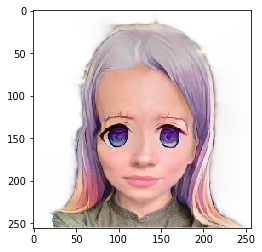

In [47]:
plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))

In [53]:
new_image = img1 * (mask.astype(np.uint8) == 0)[:, :, np.newaxis] + img2 * mask[:,:,np.newaxis]

In [54]:
new_image = new_image.astype(np.uint8)

In [55]:
vis_ind = np.argwhere(mask > 0)
vis_min = np.min(vis_ind, 0)
vis_max = np.max(vis_ind, 0)
edge = (int(vis_max[1] - vis_min[1]), int(vis_max[0] - vis_min[0]))
center = (int((vis_min[1] + vis_max[1]) / 2 + 0.5), int((vis_min[0] + vis_max[0]) / 2 + 0.5))

In [56]:
output = cv2.seamlessClone(new_image, img1,
                               (mask * 255).astype(np.uint8), center, cv2.NORMAL_CLONE)

In [57]:
image_eye, mask = get_right_eye(img1)

In [58]:
new_image = output * (mask.astype(np.uint8) == 0)[:, :, np.newaxis] + img2 * mask[:,:,np.newaxis]

In [59]:
new_image = new_image.astype(np.uint8)

In [60]:
vis_ind = np.argwhere(mask > 0)
vis_min = np.min(vis_ind, 0)
vis_max = np.max(vis_ind, 0)
edge = (int(vis_max[1] - vis_min[1]), int(vis_max[0] - vis_min[0]))
center = (int((vis_min[1] + vis_max[1]) / 2 + 0.5), int((vis_min[0] + vis_max[0]) / 2 + 0.5))

In [61]:
output = cv2.seamlessClone(new_image, output,
                               (mask * 255).astype(np.uint8), center, cv2.NORMAL_CLONE)

In [70]:
MASK_SERVICE = 'http://35.170.215.118:5242/portrait/get'


def remove_back(image_path):
    pic = base64.b64encode(open(image_path, "rb").read()).decode('utf-8')
    resp = requests.post(MASK_SERVICE, json={'image': pic})
    decoded_image = base64.b64decode(resp.json()['skin_mask'])
    decoded_image = np.frombuffer(decoded_image, dtype=np.uint8)

    return cv2.imdecode(decoded_image, flags=cv2.IMREAD_UNCHANGED)

In [71]:
mask_hair = remove_back('/home/neuralbee/workspace/cartoon/CartoonGAN-Tensorflow/dataset/face2anime/testA/15_.jpg')

In [74]:
mask_hair = cv2.resize(mask_hair/1.0,(256, 256))

In [75]:
np.max(mask_hair)

254.0

In [23]:
new_image = output * (1.0 - mask_hair/255.0)[:, :, np.newaxis] + img2 * (mask_hair[:,:,np.newaxis]/255.0)

In [76]:
new_image = img2 * (mask_hair[:,:,np.newaxis]/255.0)

In [78]:
new_image = new_image.astype(np.uint8)

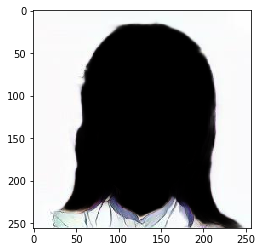

In [79]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

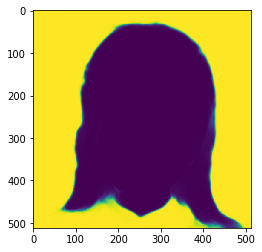

In [72]:
plt.imshow(mask_hair)

In [11]:
from urllib.request import urlopen

import numpy as np
import cv2
from matplotlib import pyplot as plt


In [10]:

from albumentations import (
    HorizontalFlip, IAAPerspective, ShiftScaleRotate, CLAHE, RandomRotate90,
    Transpose, ShiftScaleRotate, Blur, OpticalDistortion, GridDistortion, HueSaturationValue,
    IAAAdditiveGaussianNoise, GaussNoise, MotionBlur, MedianBlur, IAAPiecewiseAffine,
    IAASharpen, IAAEmboss, RandomContrast, RandomBrightness, Flip, OneOf, Compose
)

In [11]:
def download_image(url):
    data = urlopen(url).read()
    data = np.frombuffer(data, np.uint8)
    image = cv2.imdecode(data, cv2.IMREAD_COLOR)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [19]:
def augment_and_show(aug, image):
    image = aug(image=image)['image']
    plt.figure(figsize=(10, 10))
    plt.imshow(image)

In [52]:
image = img = Image.open('/home/neuralbee/workspace/denoising_gan2/datasets/faces/testA/Iw0GMk-LbJA.jpg')
#image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

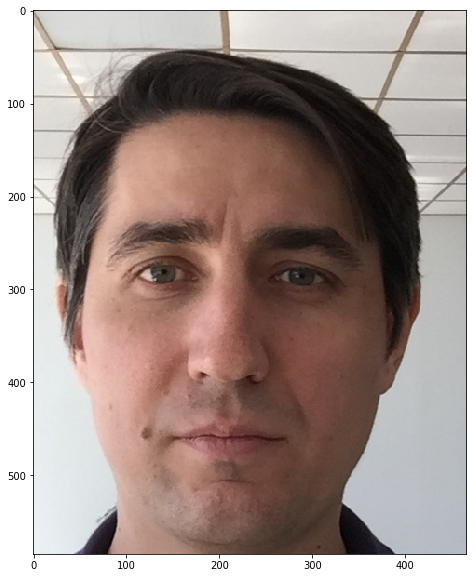

In [16]:
plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.show()

In [43]:
aug = CLAHE(p=1, clip_limit=0.1, tile_grid_size=(8,8))

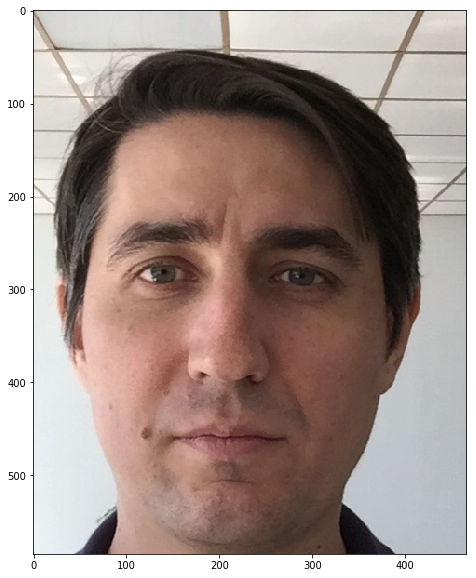

In [44]:
augment_and_show(aug, image)

In [45]:
import glob
from multiprocessing import Process
import os
import re

import numpy as np
import PIL
from PIL import Image

# Processing parameters
SIZE = 224  # for ImageNet models compatibility
TEST_DIR = 'data/test/'
TRAIN_DIR = 'data/train/'
BASE_DIR = '.'


def natural_key(string_):
    """
    Define sort key that is integer-aware
    """
    return [int(s) if s.isdigit() else s for s in re.split(r'(\d+)', string_)]


def norm_image(img):
    """
    Normalize PIL image

    Normalizes luminance to (mean,std)=(0,1), and applies a [1%, 99%] contrast stretch
    """
    img_y, img_b, img_r = img.convert('YCbCr').split()

    img_y_np = np.asarray(img_y).astype(float)

    img_y_np /= 255
    img_y_np -= img_y_np.mean()
    img_y_np /= img_y_np.std()
    scale = np.max([np.abs(np.percentile(img_y_np, 1.0)),
                    np.abs(np.percentile(img_y_np, 99.0))])
    img_y_np = img_y_np / scale
    img_y_np = np.clip(img_y_np, -1.0, 1.0)
    img_y_np = (img_y_np + 1.0) / 2.0

    img_y_np = (img_y_np * 255 + 0.5).astype(np.uint8)

    img_y = Image.fromarray(img_y_np)

    img_ybr = Image.merge('YCbCr', (img_y, img_b, img_r))

    img_nrm = img_ybr.convert('RGB')

    return img_nrm

def resize_image(img, size):
    """
    Resize PIL image

    Resizes image to be square with sidelength size. Pads with black if needed.
    """
    # Resize
    n_x, n_y = img.size
    if n_y > n_x:
        n_y_new = size
        n_x_new = int(size * n_x / n_y + 0.5)
    else:
        n_x_new = size
        n_y_new = int(size * n_y / n_x + 0.5)

    img_res = img.resize((n_x_new, n_y_new), resample=PIL.Image.BICUBIC)

    # Pad the borders to create a square image
    img_pad = Image.new('RGB', (size, size), (128, 128, 128))
    ulc = ((size - n_x_new) // 2, (size - n_y_new) // 2)
    img_pad.paste(img_res, ulc)

    return img_pad


def prep_images(paths, out_dir):
    """
    Preprocess images

    Reads images in paths, and writes to out_dir

    """
    for count, path in enumerate(paths):
        if count % 100 == 0:
            print(path)
        img = Image.open(path)
        img_nrm = norm_image(img)
        img_res = resize_image(img_nrm, SIZE)
        basename = os.path.basename(path)
        path_out = os.path.join(out_dir, basename)
        img_res.save(path_out)

In [53]:
img = norm_image(image)

In [69]:
image = cv2.imread('./IMG_0608_1.jpg')

In [70]:
image_mouth, mask = get_mouth(image)

In [71]:
cv2.imwrite('./test5mouth.jpg', image_mouth)

True

In [6]:
import glob
from sklearn.model_selection import train_test_split
from shutil import copy
with_folder = '/media/neuralbee/hard/Data/women/eyes/with_eyes/'
without_folder = '/media/neuralbee/hard/Data/women/eyes/without_eyes/'
dataset_folder = '/home/neuralbee/workspace/MUNIT-Tensorflow/dataset/eye2eye/'

In [7]:
def filter_mask(x):
    return (x.split('/')[-1].split('_')[0]=='lefteye') or (x.split('/')[-1].split('_')[0]=='righteye')

In [8]:
def get_split(source_folder, dataset_folder, train_folder, test_folder):
    X = glob.glob(source_folder + '*.*')
    X = list(filter(filter_mask, X))
    X_train, X_test = train_test_split(X, test_size=0.01, random_state=42)
    for x in X_train:
        copy(x, dataset_folder + train_folder)
    for x in X_test:
        copy(x, dataset_folder + test_folder)

In [9]:
get_split(with_folder, dataset_folder, 'trainB', 'testB')

In [10]:
get_split(without_folder, dataset_folder, 'trainA', 'testA')

In [18]:
MASK_SERVICE = 'http://35.170.215.118:5242/portrait/get'


def remove_back(image_path):
    pic = base64.b64encode(open(image_path, "rb").read()).decode('utf-8')
    resp = requests.post(MASK_SERVICE, json={'image': pic})
    decoded_image = base64.b64decode(resp.json()['skin_mask'])
    decoded_image = np.frombuffer(decoded_image, dtype=np.uint8)

    return cv2.imdecode(decoded_image, flags=cv2.IMREAD_UNCHANGED)

In [17]:
mask_hair = remove_back('/home/neuralbee/workspace/cartoon/CartoonGAN-Tensorflow/dataset/face2anime/testA/15_.jpg')

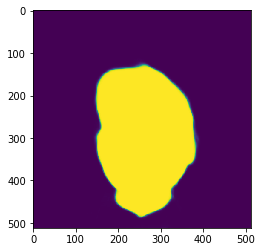

In [18]:
plt.imshow(mask_hair)

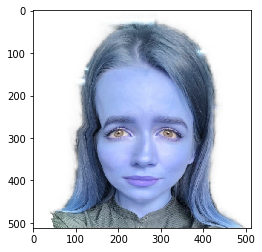

In [19]:
plt.imshow(cv2.imread('/home/neuralbee/workspace/cartoon/CartoonGAN-Tensorflow/dataset/face2anime/testA/15_.jpg'))

In [1]:
with_folder = '/media/neuralbee/hard/Data/women/eyes/with_align/'
without_folder = '/media/neuralbee/hard/Data/women/eyes/without_align/'
with_folder_skin = '/media/neuralbee/hard/Data/women/skin/with/'
without_folder_skin = '/media/neuralbee/hard/Data/women/skin/without/'

In [11]:
import dlib
import glob
from skimage.draw import circle, ellipse
import math
PREDICTOR_PATH = '/home/neuralbee/workspace/makeup/Data/shape_predictor_68_face_landmarks.dat'
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(PREDICTOR_PATH)

In [12]:
def get_landmarks(im):
    rects = detector(im, 1)
    return np.array([[p.x, p.y] for p in predictor(im, rects[0]).parts()])

In [13]:
def cut_left_eye(lands, img):
    p1 = lands[36]
    p2 = lands[39]
    p3 = (int((p1[0] + p2[0]) / 2), int((p1[1] + p2[1]) / 2))
    dist = math.hypot(p2[0] - p1[0], p2[1] - p1[1])
    point = p3
    r = int(dist / 1.5)
    rr, cc = ellipse(point[1], point[0], int(r*0.7), r, img.shape)
    img[rr,cc]=0.0
    return img

In [14]:
def cut_right_eye(lands, img):
    p1 = lands[42]
    p2 = lands[45]
    p3 = (int((p1[0] + p2[0]) / 2), int((p1[1] + p2[1]) / 2))
    dist = math.hypot(p2[0] - p1[0], p2[1] - p1[1])
    point = p3
    r = int(dist / 1.5)
    rr, cc = ellipse(point[1], point[0], int(r*0.7), r, img.shape)
    img[rr,cc]=0.0
    return img

In [15]:
def cut_mouth(lands, img):
    p1 = lands[48]
    p2 = lands[54]
    p3 = (int((p1[0] + p2[0]) / 2), int((p1[1] + p2[1]) / 2))
    dist = math.hypot(p2[0] - p1[0], p2[1] - p1[1])
    point = p3
    r = int(dist / 1.5)
    rr, cc = ellipse(point[1], point[0], int(r/1.5), r, img.shape)
    img[rr,cc]=0.0
    return img

In [20]:
for img_path in glob.glob(without_folder + '*.*'):
    try:
        skin_mask = remove_back(img_path)
        img = cv2.imread(img_path)
        lands = get_landmarks(img)
        vis_ind = np.argwhere(skin_mask > 0)
        vis_min = np.min(vis_ind, 0)
        vis_max = np.max(vis_ind, 0)
        edge = (int(vis_max[1] - vis_min[1]), int(vis_max[0] - vis_min[0]))

        skin_mask = cut_left_eye(lands,skin_mask)
        skin_mask = cut_right_eye(lands,skin_mask)
        skin_mask = cut_mouth(lands,skin_mask)
        image_face = img * (skin_mask[:,:,np.newaxis]/255.0)
        cv2.imwrite(without_folder_skin + 'mask_' + img_path.split('/')[-1], skin_mask[vis_min[0]:(vis_min[0] + edge[1]), vis_min[1]:(vis_min[1] + edge[0])])
        rgb_mean = np.mean(image_face[np.all(image_face > [10.0, 10.0, 10.0], axis=2)], axis=0)
        back = np.zeros_like(image_face)
        back[:, :] = rgb_mean
        out = back * (1.0 - skin_mask/255.0)[:, :, np.newaxis] + image_face * (skin_mask[:,:,np.newaxis]/255.0)
        cv2.imwrite(without_folder_skin + img_path.split('/')[-1], out[vis_min[0]:(vis_min[0] + edge[1]), vis_min[1]:(vis_min[1] + edge[0])])
    except Exception:
        continue

KeyboardInterrupt: 